# **Proyecto III**
### Exploracion y preprocesamiento de datos
**Daniel Bernal**

**Parte I:**

**Intencion:**

El siguiente proyecto en la primera parte tiene la intención de evaluar y preprocesar el conjunto de datos Bank Marketing, disponible en el repositorio UCI Machine Learning. A través del planteamiento de pasos clave, se busca transformar y optimizar los datos para prepararlos de manera efectiva para futuros análisis o modelado predictivo.

**Enfoque:**

El dataset contiene un total de 17 columnas, de las cuales 7 son numéricas y 10 categóricas, lo que representa un reto interesante en cuanto a la manipulación y transformación de diferentes tipos de datos. El enfoque del proyecto incluye la aplicación de técnicas avanzadas de preprocesamiento, como imputación de valores faltantes, selección de variables, y escalado de datos, además de la creación de pipelines especializados para el tratamiento tanto de datos numéricos como categóricos.

**Metodologia:**

El objetivo final es garantizar un pipeline robusto y eficiente que integre todos los pasos del procesamiento en un flujo automatizado, permitiendo su almacenamiento y reutilización mediante herramientas como joblib. Este proyecto busca no solo preparar los datos para su análisis, sino también establecer una base metodológica sólida para abordar problemas similares en otros contextos.

**Parte II:**

**Intencion:**

El siguiente proyecto en la segunda parte tiene la intención de evaluar el comportamiento temporal de los casos de viruela en Budapest a lo largo de varios años mediante el análisis de series de tiempo. Este enfoque permitirá identificar patrones estacionales, tendencias a lo largo del tiempo y posibles anomalías, lo que proporcionará información clave para comprender la dinámica de la enfermedad y predecir su comportamiento futuro.

**Enfoque:**

A través del uso de herramientas estadísticas y gráficas, como histogramas, diagramas de cajas y análisis de ruido blanco, se busca determinar si la serie de tiempo es estacionaria y modelar su estacionalidad mediante técnicas como regresión polinomial. Esto no solo ayudará a visualizar cómo los casos han cambiado a lo largo del tiempo, sino también a generar conclusiones basadas en tendencias observadas, como el comportamiento cíclico de picos y descensos, y la disminución general de los casos en años recientes.

**Metodologia:**

El análisis permitirá explorar hipótesis relacionadas con la temporalidad de los casos, sus posibles determinantes y su variabilidad interanual, con el objetivo de establecer bases sólidas para futuras estrategias de monitoreo y control de la enfermedad.

## **PARTE I**
- Utilizando el dataset de Bank realizar los siguientes pasos:
- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#Se realiza la importacion del Dataset y distintas librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

Df_PTI = pd.read_csv('/content/bank.csv', delimiter=';')

#Contiene 17 columnas, 7 numericas y 10 categoricas
Df_PTI

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### **PASO 1:**
Crear transformación de imputación para cada uno de los tipos de variables.

In [2]:
#Al inspeccionar que en el dataframe no se encuentra ningun null se decide optar por trabajar con los valores "unknown"
#En cuanto a las variable numericas, se inspeccionan una por una para verificar su contenido y si es necesario imputar
#Segun el contexto la unica variable que no debe tener 0 es age y se verifica asi: Df_PTI["age"].unique(), al estar
#completa se determina que no se imputaran las numericas

#Se opta por solo imputar variables categoricas, para esto se evalua la cantidad de valores "unknown" por columna
print("Valores en la variable 'job'","\n", Df_PTI['job'].value_counts(),"\n")
#print("Valores en la variable 'marital'","\n", Df_PTI['marital'].value_counts(),"\n")
print("Valores en la variable 'education'","\n", Df_PTI['education'].value_counts(),"\n")
print("Valores en la variable 'contact'","\n", Df_PTI['contact'].value_counts(),"\n")
#print("Valores en la variable 'month'","\n", Df_PTI['month'].value_counts(),"\n")
print("Valores en la variable 'poutcome'","\n", Df_PTI['poutcome'].value_counts(),"\n")

#Luego de este analisis se deduce que las variables con unknown en orden descendente son:
#Variable   | Cantidad | Porcentaje
#poutcome   | 3705     | 81%
#contact    | 1324     | 29.3%
#education  | 187      | 4.1%
#job        | 38       | 0.8%

#Por este motivo se decide imputar con la estrategia del mas frecuente en las variables job y education, tambien se decide
#eliminar la columna poutcome ya que no contiene mucha informacion y no afecta si se es retirada
Df_PTI_PNT1 = Df_PTI.drop(columns=["poutcome"])

#Se convierten los valores a Nan para poder imputarlos
Df_PTI_PNT1.replace('unknown', np.nan, inplace=True)

IMP_CAT_PNT1 = SimpleImputer(strategy='most_frequent')
Df_PTI_PNT1[['job','education','contact']] = IMP_CAT_PNT1.fit_transform(Df_PTI_PNT1[['job','education','contact']])

Df_PTI_PNT1

Valores en la variable 'job' 
 job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64 

Valores en la variable 'education' 
 education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64 

Valores en la variable 'contact' 
 contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64 

Valores en la variable 'poutcome' 
 poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,cellular,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,no


### **PASO 2**
Probar los respectivos escalados en los datos numéricos(maxMin,Standard, Robust)

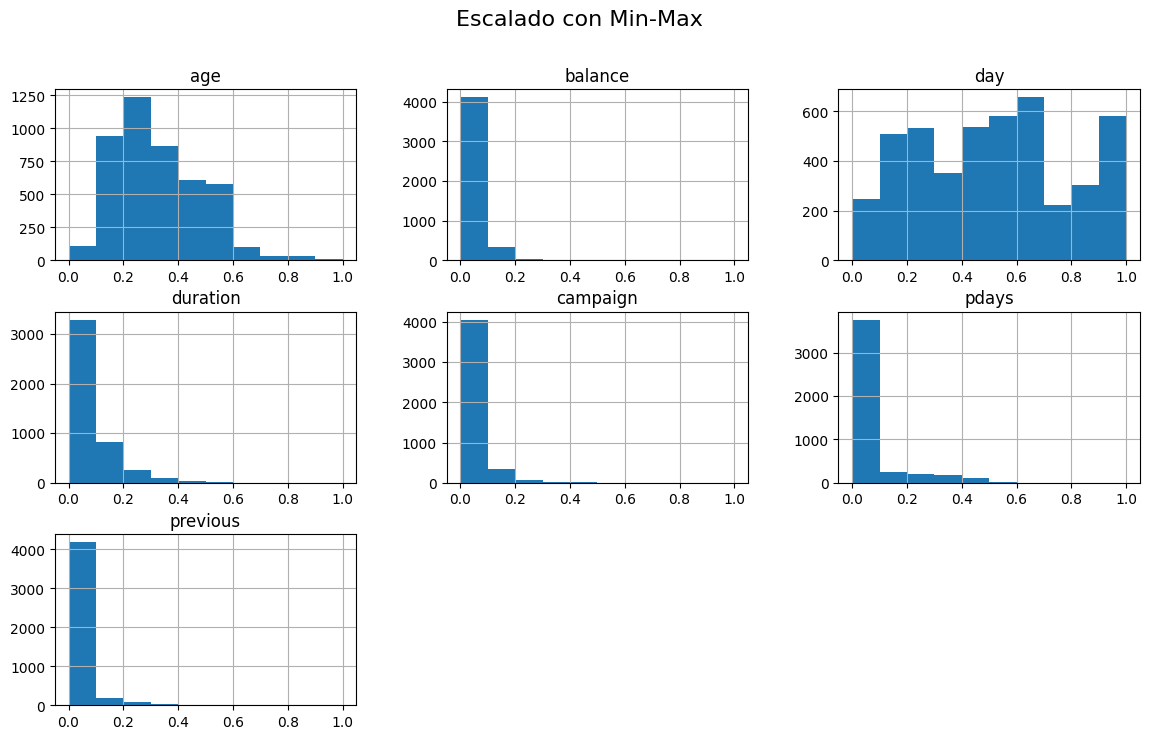

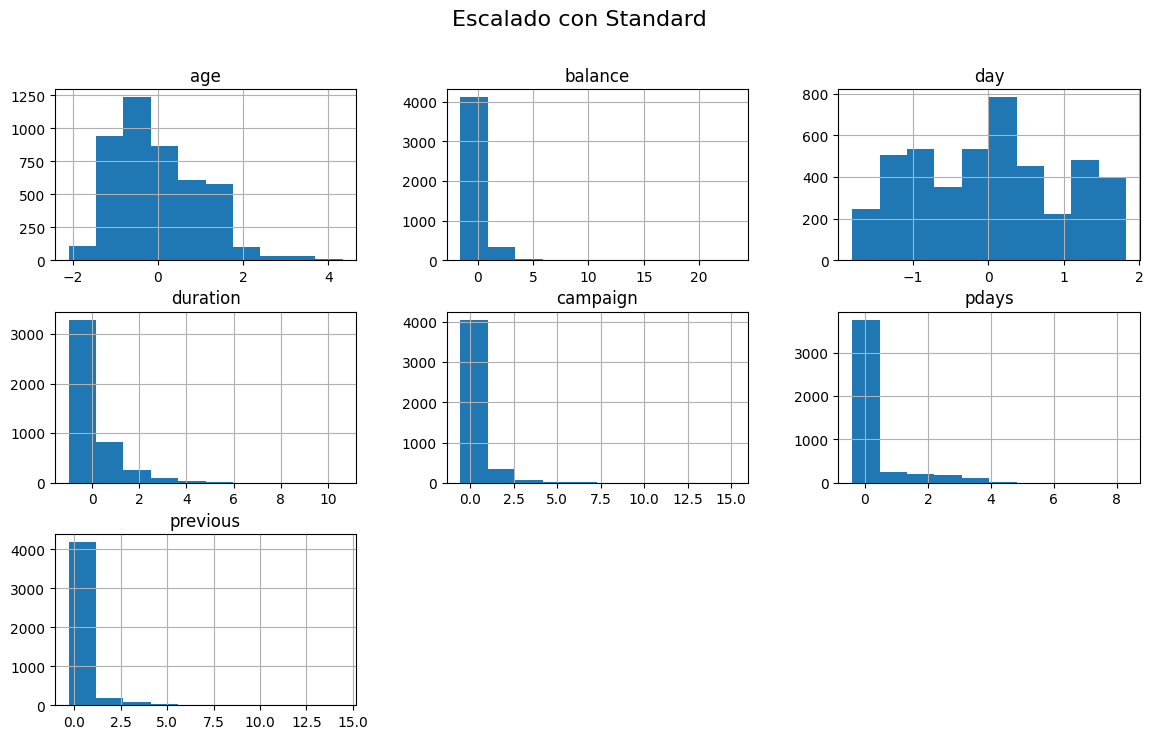

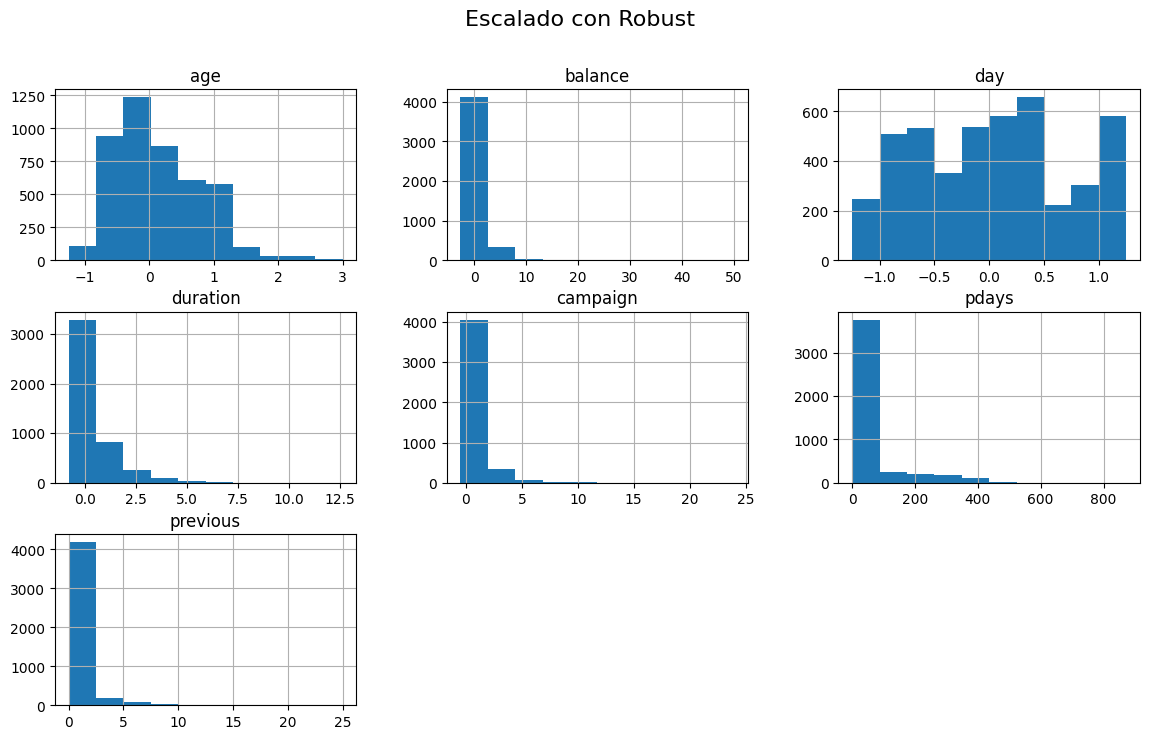

In [3]:
Df_PTI_PNT2_NUM = Df_PTI_PNT1[['age','balance','day','duration','campaign','pdays','previous']]

#Min-Max
ESC_MIN = MinMaxScaler()
minmax_scaler = ESC_MIN.fit_transform(Df_PTI_PNT2_NUM)

Min_hist = pd.DataFrame(minmax_scaler, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
Min_hist.hist(figsize=(14, 8))
plt.suptitle('Escalado con Min-Max', fontsize=16)
plt.show()

#Standard
ESC_STND = StandardScaler()
standard_scaler = ESC_STND.fit_transform(Df_PTI_PNT2_NUM)

Stnd_hist = pd.DataFrame(standard_scaler, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
Stnd_hist.hist(figsize=(14, 8))
plt.suptitle('Escalado con Standard', fontsize=16)
plt.show()

#Robust
ESC_RBST = RobustScaler()
robust_scaler = ESC_RBST.fit_transform(Df_PTI_PNT2_NUM)

Robust_hist = pd.DataFrame(robust_scaler, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
Robust_hist.hist(figsize=(14, 8))
plt.suptitle('Escalado con Robust', fontsize=16)
plt.show()

#Se decide que la mejor transfromacion a utilizar es min max por el motivo que no tiene numeros negativos, esto nos permite hacer
#mejor los analisis al contener valores entre 0 y 1, aunque robust sea mejor para valores atipicos, como podemos observar en las
#graficas, el comportamineto no cambia, sin embargo gracias a que cambia el eje x, se puede observar de mejor manera la forma en
#que se comporta

### **PASO 3**
Determinar la mejor transformación categórica(onehot vs ordinal).  

In [5]:
#Se decide que la unica variable que tiene jerarquia es "education" por este motivo sera la unica con una tranformacion
#Ordinal, las demas tendran One-HOt

Df_PTI_PNT3_ORD = Df_PTI_PNT1[['education']]
Df_PTI_PNT3_ONHT = Df_PTI_PNT1[['job',	'marital', 'default','housing',	'loan',	'contact','month']]

# Ordinal
ORD_ENC = OrdinalEncoder()
ordinal_encoded_data = ORD_ENC.fit_transform(Df_PTI_PNT3_ORD)

# One-hot
ONHT_ENC = OneHotEncoder(sparse_output=False)
onehot_encoded_data = ONHT_ENC.fit_transform(Df_PTI_PNT3_ONHT)

### **PASO 4**
Hacer la distribución de las variables numéricas más Gaussianas.

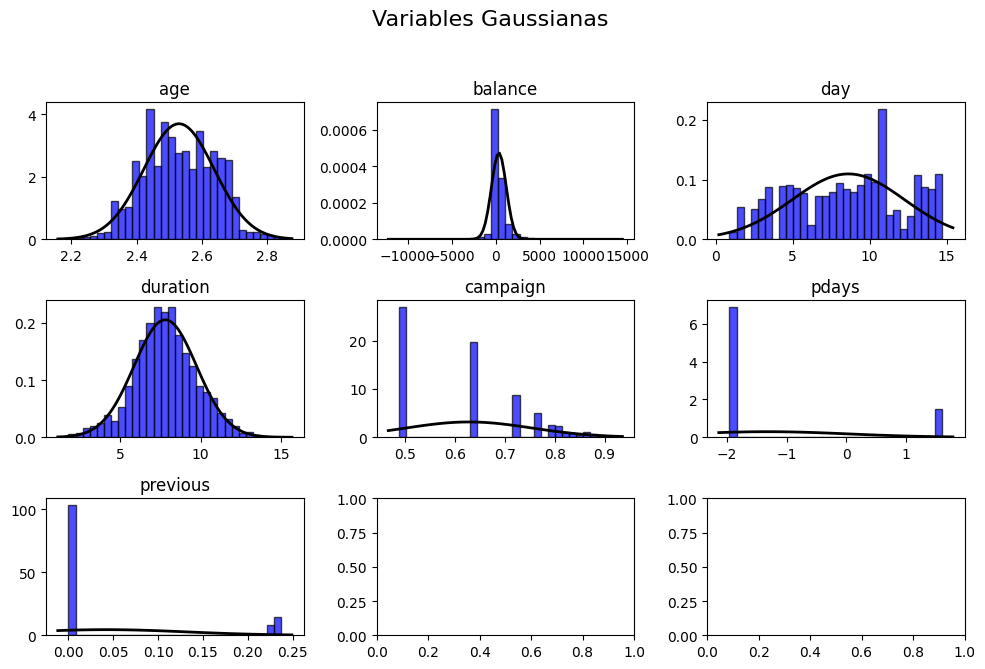

In [6]:
# Crear el transformador de potencia con el método Yeo-Johnson
gaussiano = PowerTransformer(method='yeo-johnson', standardize = False)
gaussianoTransformer = gaussiano.fit_transform(Df_PTI_PNT2_NUM)

Gauss_hist = pd.DataFrame(gaussianoTransformer, columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

# Configurar el diseño del histograma
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))
fig.suptitle('Variables Gaussianas', fontsize=16)

from scipy.stats import norm
# Histogramas y curvas de campana de Gauss
for i, col in enumerate(Gauss_hist.columns):
    ax = axes.flatten()[i]
    ax.hist(Gauss_hist[col], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

    # Añadir la línea de la campana de Gauss
    mu, std = Gauss_hist[col].mean(), Gauss_hist[col].std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **PASO 5:**
Crear un pipeline Numérico y otro Categórico. Unir ambos en un solo pipeline usando ColumnTransformer.

In [8]:
pipeline_numerico =\
   Pipeline(
      [
        ('Escalador', MinMaxScaler()), # Escalar los datos con MinMaxS
        ('Distribución', PowerTransformer(method='yeo-johnson', standardize = False)) #Tramación Gaussiana
      ]
   )

pipeline_categorico_1 =\
   Pipeline(
      [
        ('Imputador', SimpleImputer(strategy='most_frequent')), # Imputar con la moda
        ('EscaladorOHT', OneHotEncoder(sparse_output=False)) #Escalar con OneHot
      ]
   )

pipeline_categorico_2 =\
   Pipeline(
      [
        ('Imputador', SimpleImputer(strategy='most_frequent')), # Imputar con la moda
        ('EscaladorORD', OrdinalEncoder()) #Escalar con Oridnal
      ]
   )

### **PASO 6:**
Seleccionar variables más importantes y eliminar las restantes en el pipeline.

In [9]:
#Variables que se desecharan:
#default: has credit in default? (binary: "yes","no")
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#previous: number of contacts performed before this campaign and for this client (numeric)

# Definir las columnas que desea eliminar
columns_to_drop = [4,15,14,13]

# Crear el transformer para eliminar columnas
def drop_columns(X, columns_to_drop):
    return X.drop(columns=[col for col in columns_to_drop if col in X.columns])

# Crear el pipeline para eliminar columnas
from sklearn.preprocessing import FunctionTransformer
pipeline_drop_columns = Pipeline([
    ('drop_columns', FunctionTransformer(func=drop_columns, kw_args={'columns_to_drop': columns_to_drop}))
])

transformer = ColumnTransformer(
  [
      ('Numerico',pipeline_numerico, [0,5,9,11,12,13,14]),
      ('Categorico_1',pipeline_categorico_1, [1,2,4,5,6,7,8,10,14,15]),
      ('Categorico_2',pipeline_categorico_2, [3]),
      ('drop_columns', pipeline_drop_columns, [4, 15, 14, 13])
  ]
)

transformer.fit(Df_PTI_PNT1)
transformer.transform(Df_PTI_PNT1)

transformer

ColumnTransformer(transformers=[('Numerico',
                                 Pipeline(steps=[('Escalador', MinMaxScaler()),
                                                 ('Distribución',
                                                  PowerTransformer(standardize=False))]),
                                 [0, 5, 9, 11, 12, 13, 14]),
                                ('Categorico_1',
                                 Pipeline(steps=[('Imputador',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('EscaladorOHT',
                                                  OneHotEncoder(sparse_output=False))]),
                                 [1, 2, 4, 5, 6, 7, 8, 10, 14, 15]),
                                ('Categorico_2',
                                 Pipeline(steps=[('Imputador',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('EscaladorORD',
                                                  OrdinalEncoder())]),
                                 [3]),
                                ('drop_columns',
                                 Pipeline(steps=[('drop_columns',
                                                  FunctionTransformer(func=<function drop_columns at 0x79b92799d510>,
                                                                      kw_args={'columns_to_drop': [4,
                                                                                                   15,
                                                                                                   14,
                                                                                                   13]}))]),
                                 [4, 15, 14, 13])])

### **PASO 7:**
Guardar el pipeline como joblib.

In [10]:
import joblib

joblib.dump(transformer,"transformer.joblib")

['transformer.joblib']

### **PASO 8:**
Cargar el pipeline y probarlo con un dato de entrada.

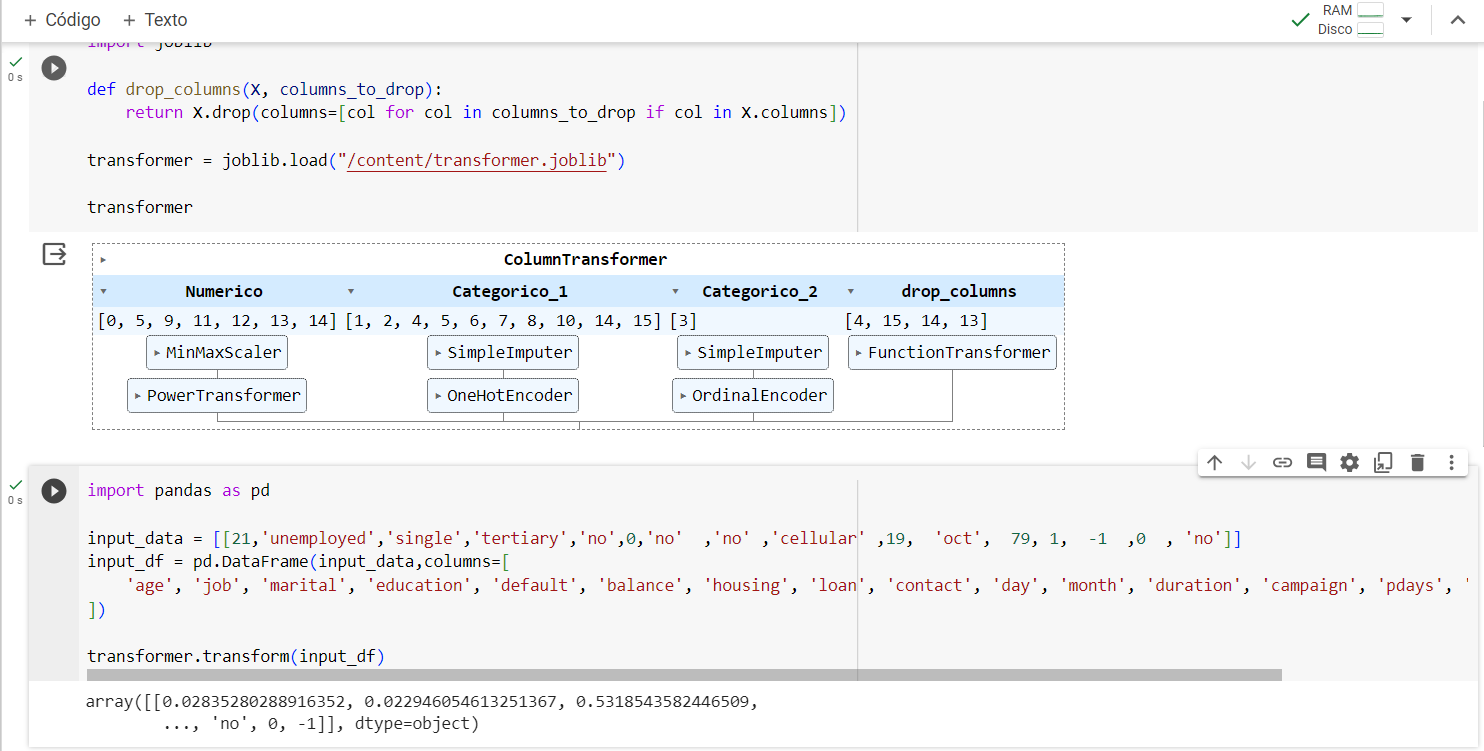

## **PARTE II**
- Usando el data set de hungary_chickenpox_data(casos de viruela), crear una serie de tiempo con los casos de viruela de Budapest.

**Graficar los casos de viruela en Budapest**

In [ ]:
df = pd.read_csv('/content/hungary_chickenpox.csv')
df

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.index = df['Date']
serie = pd.Series(df["BUDAPEST"], df.index)

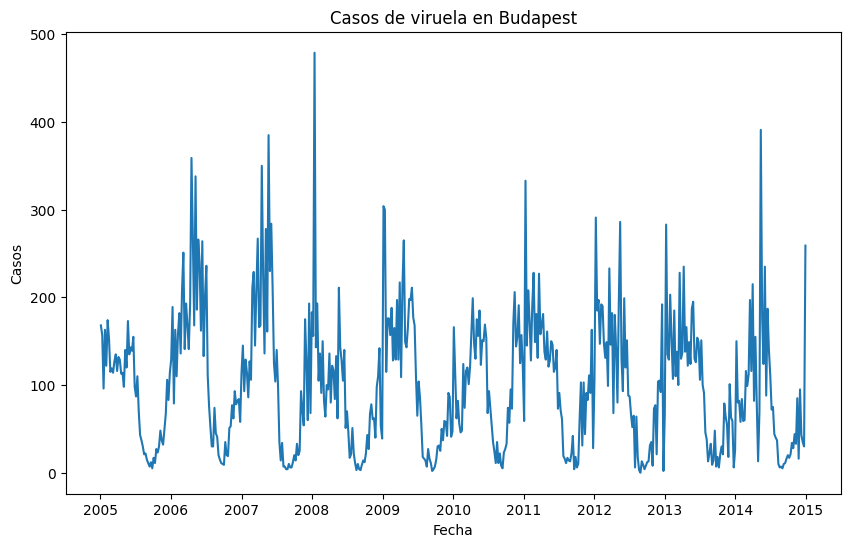

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(serie)
plt.title("Casos de viruela en Budapest")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.show()

**DIBUJAR HISTOGRAMA POR AÑO**

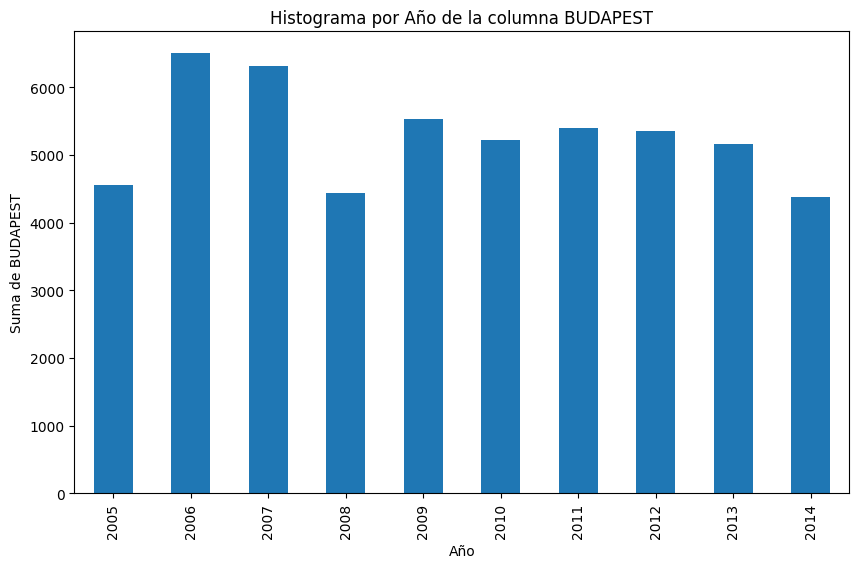

In [ ]:
plt.figure(figsize=(10, 6))
df['BUDAPEST'].groupby(df['Year']).sum().plot(kind='bar')
plt.title('Histograma por Año de la columna BUDAPEST')
plt.xlabel('Año')
plt.ylabel('Suma de BUDAPEST')
plt.show()

**DIAGRAMA DE CAJAS POR AÑO**

<Figure size 1000x600 with 0 Axes>

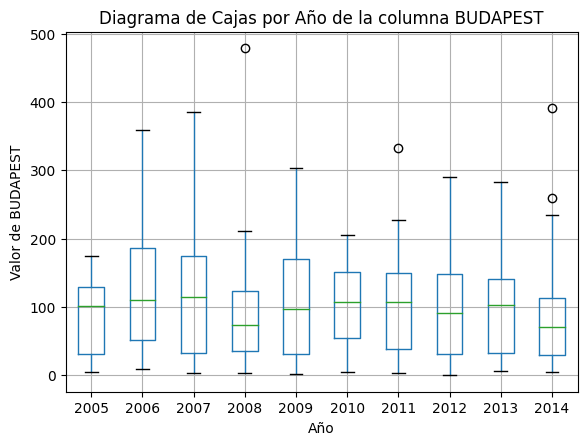

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='BUDAPEST', by='Year')
plt.title('Diagrama de Cajas por Año de la columna BUDAPEST')
plt.xlabel('Año')
plt.ylabel('Valor de BUDAPEST')
plt.suptitle('')
plt.show()

**ANÁLISIS DE LOS RESULTADOS OBTENIDOS**

Se puede observar en la primera gráfica que no es constante, tiene picos, grandes subidas y bajadas, pero ese comportamiento sigue el patrón de subir tener un pico e iniciar a descender.

Hay pocos datos atípicos, esto lo podemos observar en el boxplot, cada año varía la cantidad de casos, pero se puede observar que en la mayoría hay un sesgo en el último cuartil a escepción del año 2005 y 2010.

Se podría decir que para los últimos meses del año incrementan en cantidad los cases de viruela en Budapest, haciendo este sesgo, también por el histograma podemos decir que es común que por año se presenten casi la misma cantidad de casos con una desviación estandar de 76 o 77 casos

**WHITE NOISE**

In [ ]:
media = serie.mean()
varianza = serie.var()
desviacion_estandar = np.std(serie)
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Desviacion: {desviacion_estandar}")

Media: 101.24521072796935
Varianza: 5830.066435752054
Desviacion: 76.28169981132447


In [ ]:
dfII = pd.DataFrame(serie)
Df = pd.DataFrame()
ts = dfII.iloc[:, 0]

In [ ]:
Df.index = ts.index
Df["t"] = ts.values
Df["t-1"] = ts.shift(1)
Df["t-2"] = ts.shift(2)
Df["t-3"] = ts.shift(3)
Df["t-4"] = ts.shift(4)
Df["t-5"] = ts.shift(5)
Df["t-6"] = ts.shift(6)
Df["t-7"] = ts.shift(7)
Df["t-8"] = ts.shift(8)
Df["t-9"] = ts.shift(9)
Df["t-10"] = ts.shift(10)

In [ ]:
Df

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
Date,,,,,,,,,,,
2005-01-03,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,157,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-17,96,157.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-24,163,96.0,157.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,122,163.0,96.0,157.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,95,16.0,85.0,33.0,44.0,28.0,34.0,21.0,17.0,20.0,16.0
2014-12-08,43,95.0,16.0,85.0,33.0,44.0,28.0,34.0,21.0,17.0,20.0
2014-12-15,35,43.0,95.0,16.0,85.0,33.0,44.0,28.0,34.0,21.0,17.0


<Axes: title={'center': 'Autocorrelación'}>

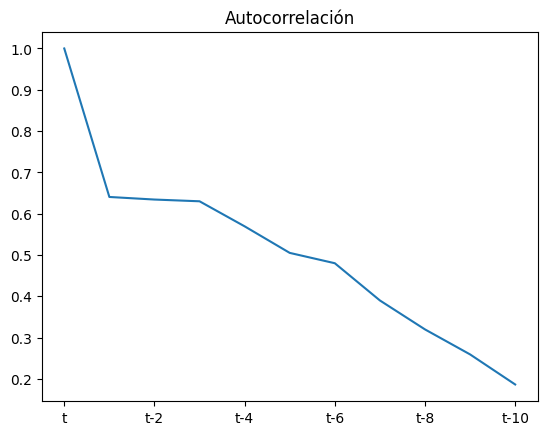

In [ ]:
dfIII = Df.corr()
plt.title('Autocorrelación')
dfIII["t"].plot()

In [ ]:
ts.rolling(window=12).mean()

Date
2005-01-03          NaN
2005-01-10          NaN
2005-01-17          NaN
2005-01-24          NaN
2005-01-31          NaN
                ...    
2014-12-01    35.000000
2014-12-08    37.666667
2014-12-15    39.250000
2014-12-22    40.083333
2014-12-29    60.250000
Name: BUDAPEST, Length: 522, dtype: float64

In [ ]:
ts.rolling(window=12).std()

Date
2005-01-03          NaN
2005-01-10          NaN
2005-01-17          NaN
2005-01-24          NaN
2005-01-31          NaN
                ...    
2014-12-01    27.432562
2014-12-08    26.424277
2014-12-15    25.563202
2014-12-22    25.036186
2014-12-29    67.018485
Name: BUDAPEST, Length: 522, dtype: float64

Tiene una autocorrelación débil positiva lo que quiere decir que los elementos cercanos en el espacio o en el tiempo se parecen poco entre sí que con respecto a elementos más lejanos, solamente por el hecho de estar cerca.

**Determinar si la serie es estacionaria**

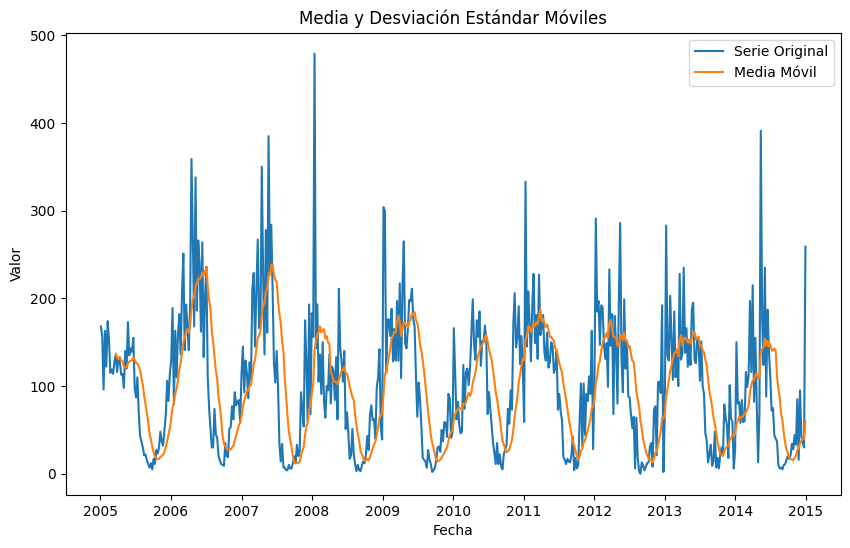

In [ ]:
rolling_mean = serie.rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(serie, label='Serie Original')
plt.plot(rolling_mean, label='Media Móvil')
plt.legend()
plt.title('Media y Desviación Estándar Móviles')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

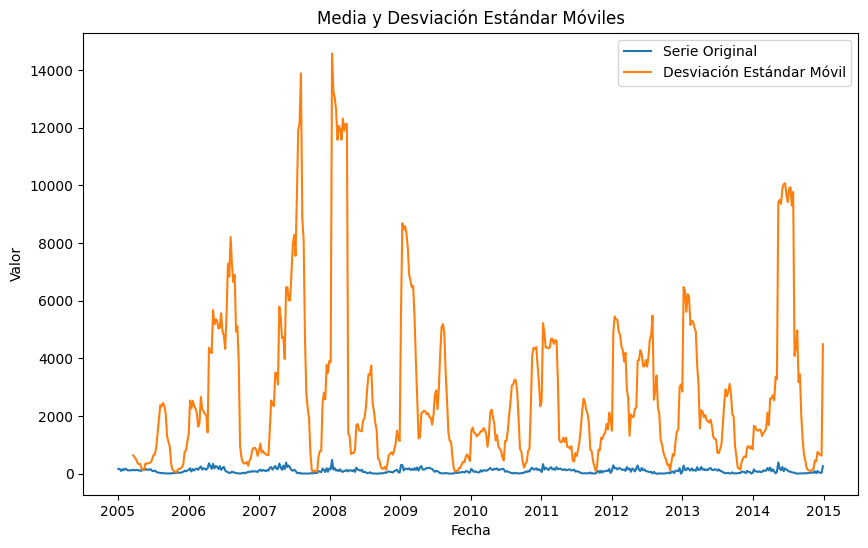

In [ ]:
rolling_std = serie.rolling(window=12).var()

plt.figure(figsize=(10, 6))
plt.plot(serie, label='Serie Original')
plt.plot(rolling_std, label='Desviación Estándar Móvil')
plt.legend()
plt.title('Media y Desviación Estándar Móviles')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

Una serie estacionaria es una serie que no tiene tendencias ni estacionalidad. En otras palabras, la media, la varianza y la autocorrelacion de la serie no cambian con el tiempo. la serie estacionaria contiene al ruido blanco y los dos se relacionan pero no son lo mismo ya que una serie puede ser estacionaria pero no ruido blanco.

Teniendo lo anterior en cuenta, se puede deducir que **no es una serie estacionaria**, ya que la media móvil no es exactamente constante, se puede observar que intenta llevar una constacia como si fuera un coseno, pero tiene sus pequeños cambios.

Por otra parte, la varianza fluctúa contantemente, como se puede observar en la gráfica, no lleva una periocidad descartando completamente ser estacionaria y por último su autocorrelación débil hace que no cumpla con ninguna de las caracteristicas de las series estacionarias.

**Realizar una regresión polinomial para modelar la temporalidad(Seasonality)**

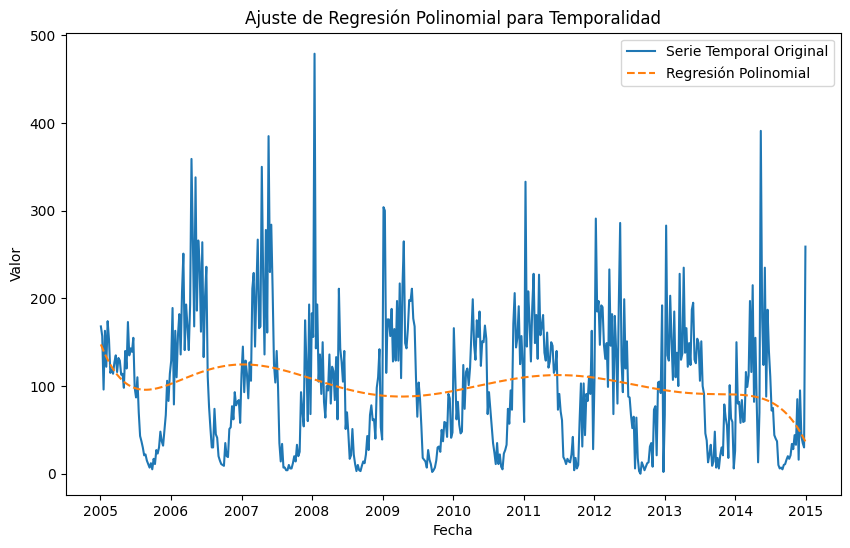

In [ ]:
df = pd.DataFrame({'Fecha': serie.index, 'Valor': serie.values})
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.set_index('Fecha', inplace=True)
df['Días'] = (df.index - df.index[0]).days
coef = np.polyfit(df['Días'], df['Valor'], 7)
poly = np.poly1d(coef)
df['Predicción'] = poly(df['Días'])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Valor'], label='Serie Temporal Original')
plt.plot(df.index, df['Predicción'], label='Regresión Polinomial', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Ajuste de Regresión Polinomial para Temporalidad')
plt.legend()
plt.show()

En la anterior serie temporal podemos evidenciar una regresion polinomial la cual indica como los casos van disminuyendo conforme pasan los años comenzando dicha regresion en un valor aproximado de 150 y teniendo variaciones dependiendo el año y mes pero teniendo como conclusion a inicios de 2015 un descenso drastico comparado al dato obtenido del 2005. esto puede dar una prediccion a futuro de los casos de viruela en budapest durante los siguientes años siguiendo la tendencia que describe la linea. siendo esta una disminucion en los casos